In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

#@Author Keiser, Haider

# Data preperation
* renaming column names
* check for empty data and duplicates

In [153]:
df = pd.read_csv("files\\fish_data.csv")
df.columns = ['species', 'length', 'weight', 'weight/length']

In [154]:
df.groupby(['species'])['weight'].mean()

species
Bronze croaker                   3.198355
Climbing perch                   3.271239
Gangetic whiting                 6.143143
Goldspotted grenadier anchovy    2.747711
Pama croaker                     3.849563
Paradise threadfin               3.989782
Rosy barb                        4.585453
Scaly hairfin anchovy            3.101750
Spanner barb                     2.632799
Name: weight, dtype: float64

In [155]:
df.isnull().sum()
df.isna().sum()

species          0
length           0
weight           0
weight/length    0
dtype: int64

In [156]:
df.duplicated().sum()

109

In [157]:
fish_ladder_avg = df.groupby(['species'])['weight'].max().sort_values()

top_10 = fish_ladder_avg.tail(10)

least_10 = fish_ladder_avg.head(10)

bottom_top = pd.concat([top_10, least_10])


C:\Users\Windows\AppData\Local\Temp\ipykernel_19628\2229327402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=least_10.index, palette='RdYlBu_r')


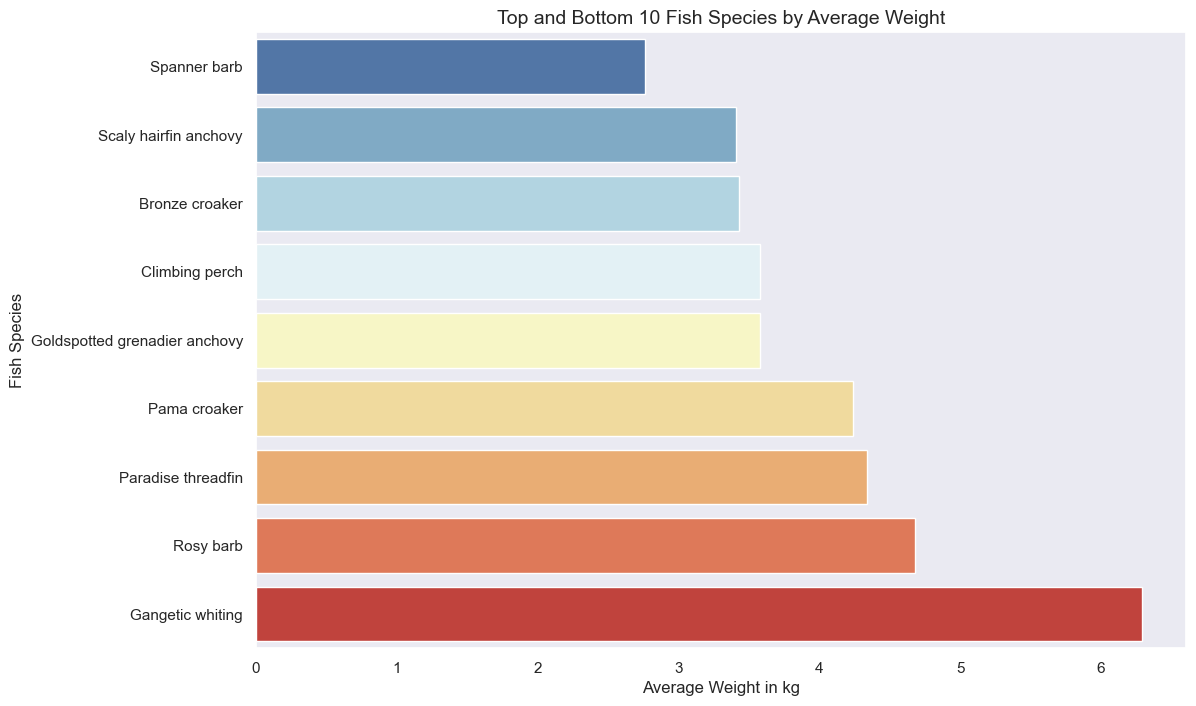

In [158]:

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10.values, y=least_10.index, palette='RdYlBu_r')

plt.title('Top and Bottom 10 Fish Species by Average Weight', fontsize=14)
plt.xlabel('Average Weight in kg', fontsize=12)
plt.ylabel('Fish Species', fontsize=12)
plt.show()


In [159]:
sns.distplot(df['length'])

C:\Users\Windows\AppData\Local\Temp\ipykernel_19628\2755753118.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['length'])


<Axes: xlabel='length', ylabel='Density'>

In [160]:
array = np.array(df['weight'])
#array = np.array([df['weight'], df['length']])
array

array([3.45, 3.27, 3.46, ..., 6.25, 6.11, 6.14])

In [161]:
np.mean(array)

3.739875

In [162]:
np.sum(array)

15258.69

In [163]:
np.min(array)

2.05

In [164]:
np.max(array)

6.29

In [165]:
np.argmin(array) #Index of the minimum value


828

In [166]:
np.argmax(array)


4016

In [167]:
np.sort(array)[:3]

array([2.05, 2.09, 2.15])

In [168]:
np.sort(array)[-3:]


array([6.27, 6.27, 6.29])

# Data visualization

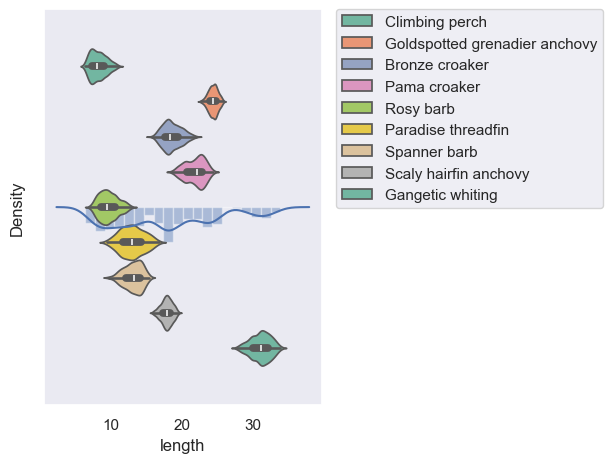

In [169]:
sns.violinplot( x='length', data=df, palette='Set2', legend=True,hue='species', gridsize=300)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Show the plot
plt.tight_layout()
plt.show()

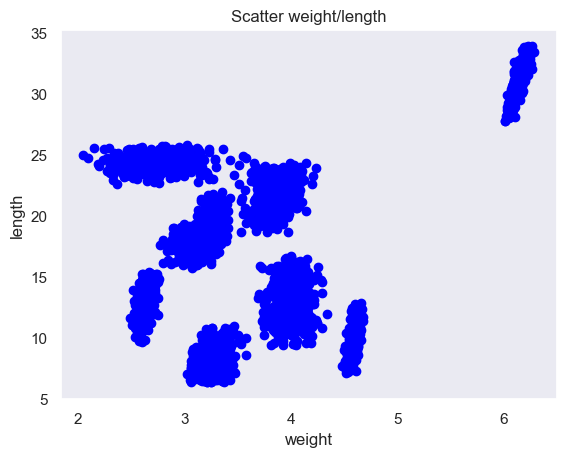

In [170]:
plt.scatter(x=df['weight'], y=df['length'], color="blue")
plt.xlabel('weight')
plt.ylabel('length')
plt.title('Scatter weight/length')
plt.show()

In [171]:
X = df[['length']].values
y = df['weight'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Evaluation
print('Accuracy: ', r2) # how accurate the test is, compared to the prediction

Accuracy:  0.16278470090854813


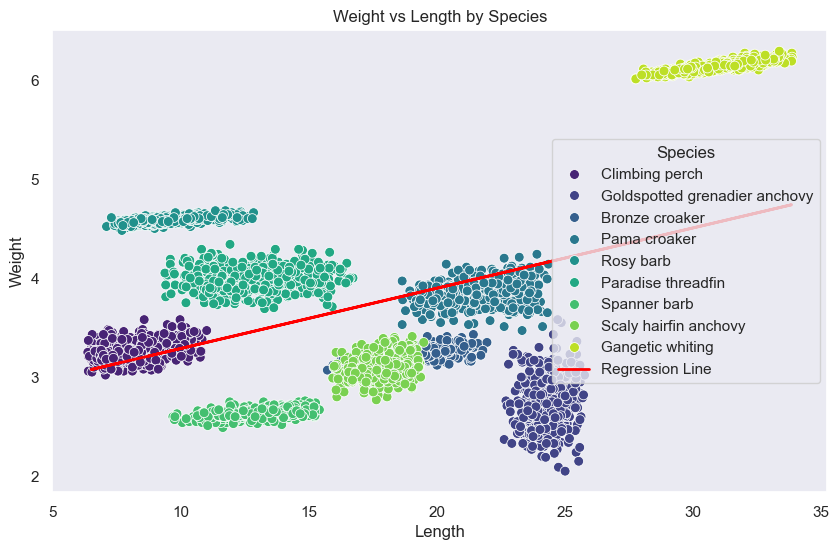

In [172]:
sns.set(style="dark")
plt.figure(figsize=(10, 6))

# Scatter plot with Seaborn and viridis color palette
sns.scatterplot(data=df, x='length', y='weight', hue='species', palette='viridis', s=50)

# Regression line with specified color, linewidth, and label
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")

# Titles and labels
plt.title("Weight vs Length by Species")
plt.xlabel("Length")
plt.ylabel("Weight")

# Show legend with title
plt.legend(title='Species')
plt.show()


Length and weight by species

# ML_Validation 
* length und weight sind vorhersagbar

In [173]:
# Initialize the Decision Tree Classifier
features = ['length', 'weight']
X = df[features]
y = df['species']

dtree = DecisionTreeClassifier(max_depth=3)
dtree = dtree.fit(X, y)
tree.plot_tree(dtree, feature_names=features)

[Text(0.5909090909090909, 0.875, 'weight <= 4.41\ngini = 0.889\nsamples = 4080\nvalue = [468, 476, 455, 415, 435, 458, 475, 480, 418]'),
 Text(0.36363636363636365, 0.625, 'weight <= 3.52\ngini = 0.857\nsamples = 3150\nvalue = [468.0, 476.0, 0.0, 415.0, 435.0, 458.0, 0.0, 480.0\n418.0]'),
 Text(0.4772727272727273, 0.75, 'True  '),
 Text(0.18181818181818182, 0.375, 'length <= 15.565\ngini = 0.8\nsamples = 2255\nvalue = [468, 473, 0, 413, 3, 0, 0, 480, 418]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.498\nsamples = 891\nvalue = [0, 473, 0, 0, 0, 0, 0, 0, 418]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.667\nsamples = 1364\nvalue = [468.0, 0.0, 0.0, 413.0, 3.0, 0.0, 0.0, 480.0, 0.0]'),
 Text(0.5454545454545454, 0.375, 'length <= 17.68\ngini = 0.505\nsamples = 895\nvalue = [0.0, 3.0, 0.0, 2.0, 432.0, 458.0, 0.0, 0.0, 0.0]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.013\nsamples = 461\nvalue = [0, 3, 0, 0, 0, 458, 0, 0, 0]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.009\nsamples = 

Decision Tree visualization
Length and weight by species

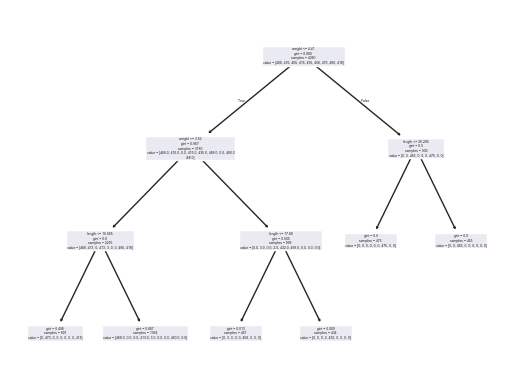

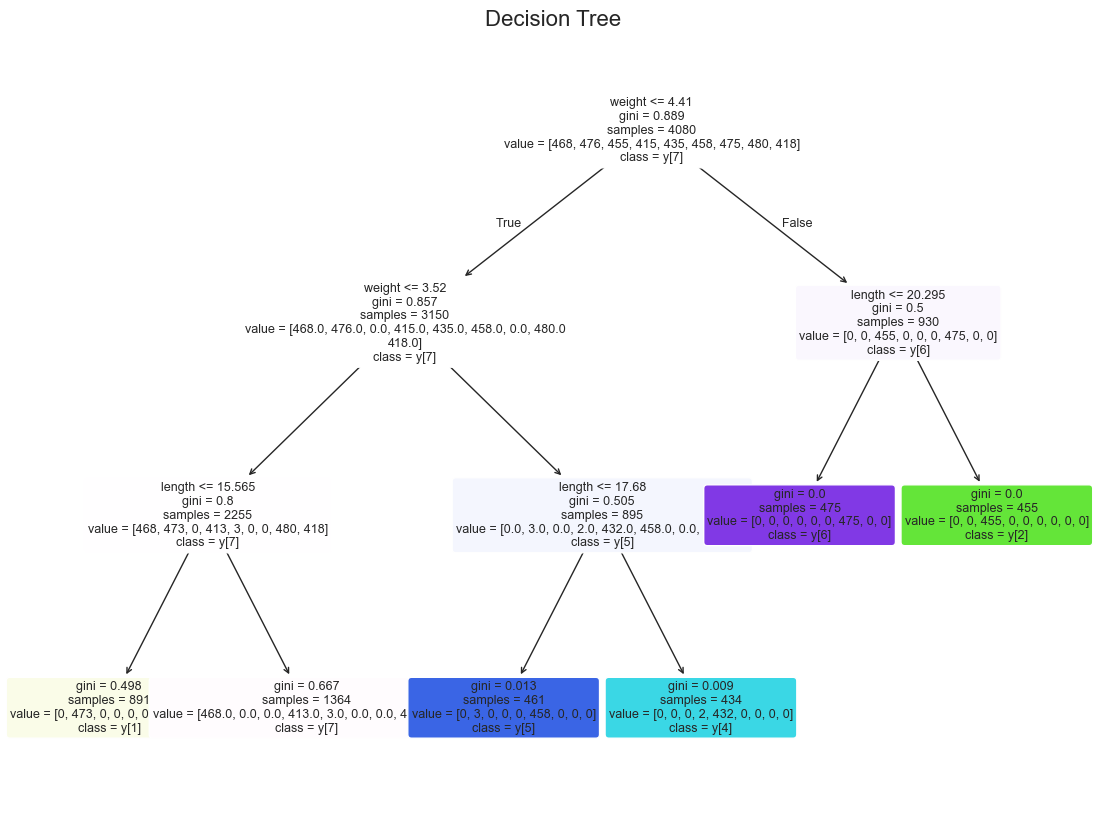

In [174]:
# Plot the decision tree
plt.figure(figsize=(14, 10))
plot_tree(dtree, feature_names=X.columns, class_names=True, filled=True, rounded=True, fontsize=9)
plt.title("Decision Tree", fontsize=16)
plt.show()
# gini = how mixed classes are
# sample = number of data points
# values = distribution of data points
# class lable based on the majority of samples

# Confusion Matrix

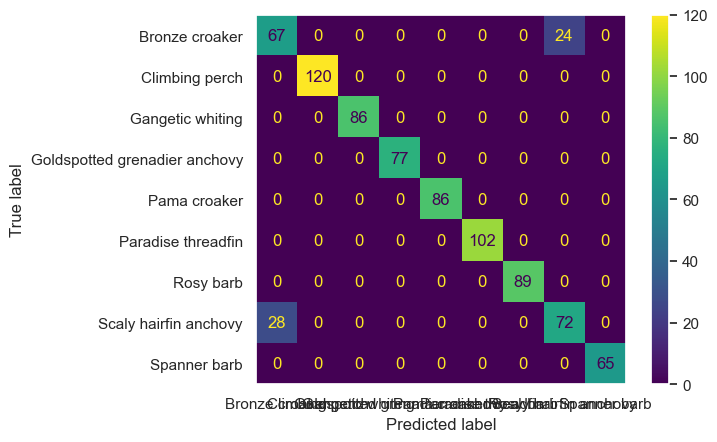

In [175]:
class_names = y
X = df[['length', 'weight', 'weight/length']]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) # reshape data accordingly here!

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

KNN-Classifier
Precision of each species
Recall = fewer FN (false Negatives)
Support = Number of true instances

In [176]:
#X_train, X_test, y_train, y_test = train_test_split(df[['weight']], df['species'], test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit the KNN model
k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9338235294117647

Classification Report:
                                precision    recall  f1-score   support

               Bronze croaker       0.68      0.77      0.72        91
               Climbing perch       1.00      1.00      1.00       120
             Gangetic whiting       1.00      1.00      1.00        86
Goldspotted grenadier anchovy       1.00      1.00      1.00        77
                 Pama croaker       1.00      1.00      1.00        86
           Paradise threadfin       1.00      1.00      1.00       102
                    Rosy barb       1.00      1.00      1.00        89
        Scaly hairfin anchovy       0.76      0.67      0.71       100
                 Spanner barb       1.00      1.00      1.00        65

                     accuracy                           0.93       816
                    macro avg       0.94      0.94      0.94       816
                 weighted avg       0.94      0.93      0.93       816


KNN-Regression
https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

In [177]:
X_train, X_test, y_train, y_test = train_test_split(df[['weight']], df['length'], test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit the KNN regressor
k = 3
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 22.393501402505443
R-squared: 0.5550660020422173


## Values for different K-Values
RMSE --> Root mean square error

A smaller RMSE value implies:
* Less deviation between the predicted and true values.
* Higher accuracy of the model.
Best K-Value ==> 20

In [178]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 5.497732888360865
RMSE value for k=  2 is: 5.051161300539572
RMSE value for k=  3 is: 4.732177237013153
RMSE value for k=  4 is: 4.563887541663733
RMSE value for k=  5 is: 4.391158822443293
RMSE value for k=  6 is: 4.4042392494065385
RMSE value for k=  7 is: 4.339612815189197
RMSE value for k=  8 is: 4.2897410058342
RMSE value for k=  9 is: 4.250016716472173
RMSE value for k=  10 is: 4.212900960291553
RMSE value for k=  11 is: 4.1954494064313455
RMSE value for k=  12 is: 4.168986831348733
RMSE value for k=  13 is: 4.152050003666219
RMSE value for k=  14 is: 4.153926803944914
RMSE value for k=  15 is: 4.147289377643814
RMSE value for k=  16 is: 4.139815699153623
RMSE value for k=  17 is: 4.115172203358937
RMSE value for k=  18 is: 4.115282500142509
RMSE value for k=  19 is: 4.12091151347657
RMSE value for k=  20 is: 4.113153583188581


In [179]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

<Axes: >

## Best K-Value

In [180]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 9}

#Support Vector Machines (SVMs)

In [181]:
from sklearn.svm import SVC

# Features (X) and target (y)
X = df[['length', 'weight', 'weight/length']]
y = df['species']

# Convert species to numeric labels (if needed)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)  # Encodes species as integers

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the SVM classifier
svm = SVC(kernel='rbf', C=1.0, gamma='scale')  # Default parameters
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9227941176470589
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.58      0.63        91
           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00        86
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00        86
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00        89
           7       0.66      0.75      0.70       100
           8       1.00      1.00      1.00        65

    accuracy                           0.92       816
   macro avg       0.93      0.93      0.93       816
weighted avg       0.92      0.92      0.92       816

Confusion Matrix:
[[ 53   0   0   0   0   0   0  38   0]
 [  0 120   0   0   0   0   0   0   0]
 [  0   0  86   0   0   0   0   0   0]
 [  0   0   0  77   0   0   0   0   0]
 [  0   0   0   0  86   0   0   0   0]
 [  0   0   0   0   0 102   0 

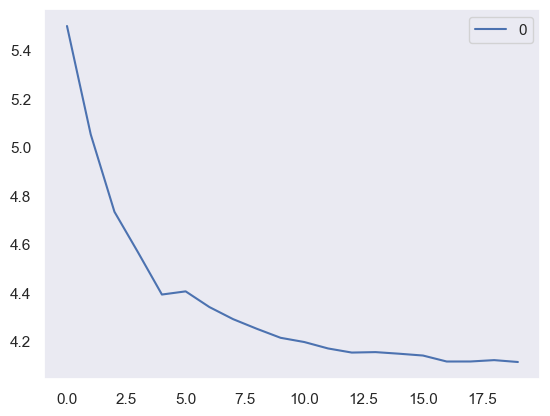

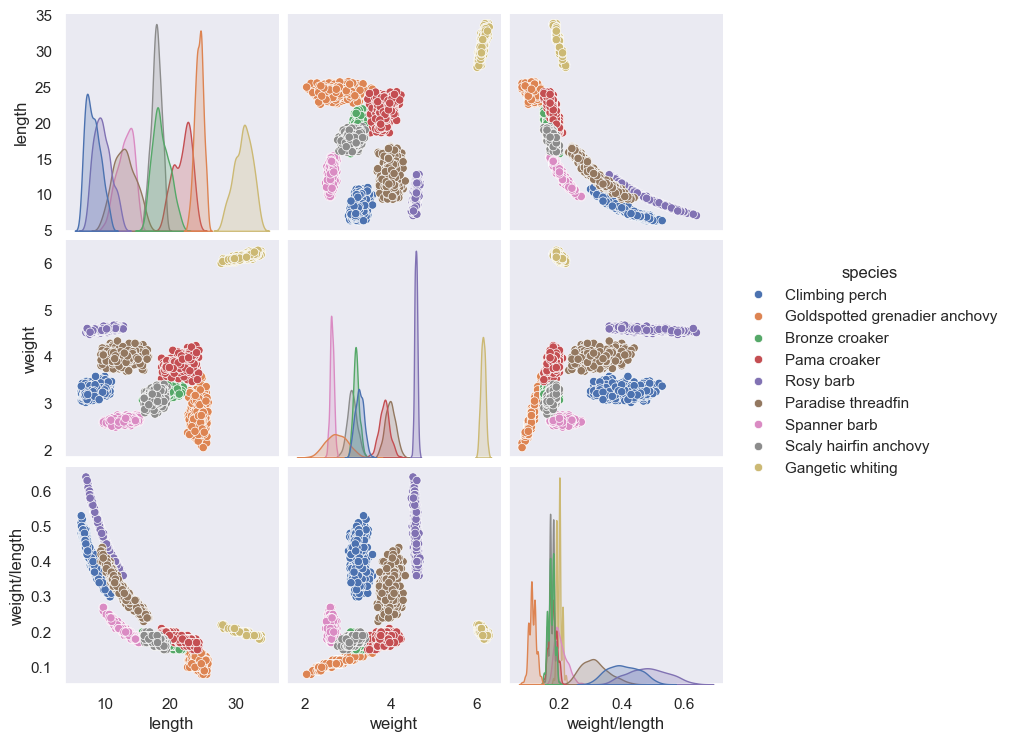

In [182]:
# Pairplot to visualize feature relationships
sns.pairplot(df, hue='species', diag_kind='kde')
plt.show()


# Clustering (K-Means)

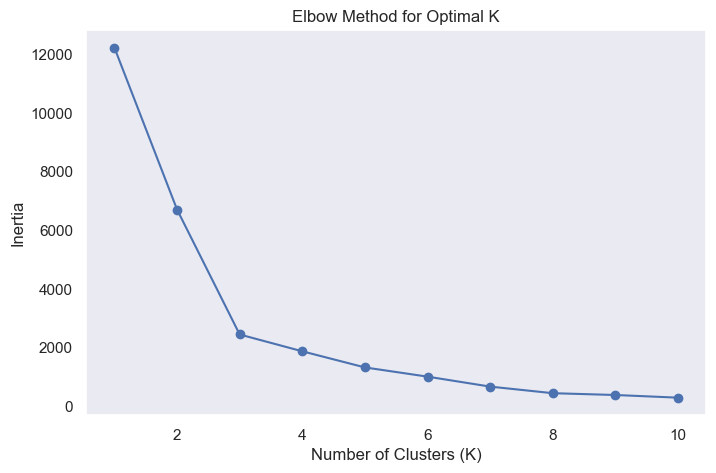

In [183]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Select numerical features
X = df[['length', 'weight', 'weight/length']]

# Scale the data (K-Means is sensitive to feature scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


Cluster Centers:
[[ 0.62845611  0.09989246 -0.61866637]
 [-1.42077863 -0.47297428  1.60122738]
 [ 1.9277116   2.31030759 -0.4431248 ]
 [ 0.11340789 -0.56757644 -0.64123467]
 [-1.11894473  0.80338465  1.95777174]
 [-0.59837463  0.2911339   0.4854349 ]
 [ 0.98258518 -0.95919242 -1.13784738]
 [-0.60187224 -1.0642534  -0.40256715]
 [-1.15105373 -0.36297885  0.93738282]]


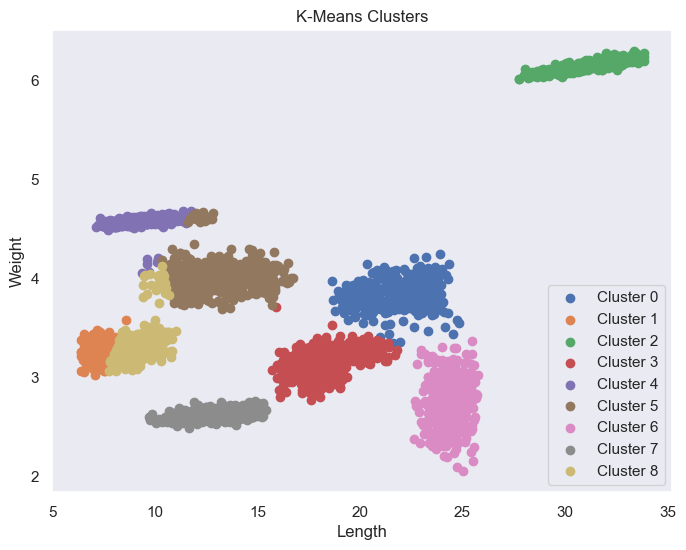

In [184]:
# Train K-Means with optimal K
kmeans = KMeans(n_clusters=9, random_state=42) # K value
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Print cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)
# 2D scatter plot of clusters
plt.figure(figsize=(8, 6))
for cluster in range(9):  # Adjust based on the number of clusters
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['length'], cluster_data['weight'], label=f'Cluster {cluster}')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('K-Means Clusters')
plt.legend()
plt.show()


# Neuronal Networks
## Multilayer Perceptron (MLP)
### Classification
* Scaly hairfin anchovy and Pama croaker overlap

Parameter:
* hidden_layer_size: Number of Neurons in the hidden layer (Default: (100,))
* activation: The activationfunction (Default: relu)
* solver: For weight optimization (Method to determine the weights for every neuron) (Default: adam)
* learning_rate: When weight updates should be scheduled (Default: constant)
Ofcourse

Score:
*Accuracy 0.94 is good, but the Scaly hairfin anchovy and the Pama croaker overlap (Same wheight and height)




In [201]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import classification_report, confusion_matrix

X = df[['length', 'weight', 'weight/length']]
y = df['species']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 10), max_iter=500, activation='tanh', random_state=42) #loops 500 times

# Train the model
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)
# Calculation of probability
y_prob = mlp.predict_proba(X_test)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("probability of 100 test instances:")
print(np.round(y_prob[:100], 3)) # 3 comma digits

Confusion Matrix:
[[ 74   0   0   0   0   0   0  17   0]
 [  0 120   0   0   0   0   0   0   0]
 [  0   0  86   0   0   0   0   0   0]
 [  0   0   0  77   0   0   0   0   0]
 [  0   0   0   0  86   0   0   0   0]
 [  0   0   0   0   0 102   0   0   0]
 [  0   0   0   0   0   0  89   0   0]
 [ 35   0   0   0   0   0   0  65   0]
 [  0   0   0   0   0   0   0   0  65]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        91
           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00        86
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00        86
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00        89
           7       0.79      0.65      0.71       100
           8       1.00      1.00      1.00        65

    accuracy                           0.94       816
   macro a

### Regression

In [189]:
X = df[['length', 'weight', 'weight/length']]
y = df['species']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLPClassifier
mlp = MLPRegressor(hidden_layer_sizes=(100), max_iter=200, activation='relu', random_state=None) #loops 500 times

# Train the model
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")

print(classification_report(y_test, y_pred))
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Define a simple MLP model
model = Sequential([
    Dense(128, activation='relu', input_dim=3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Visualize the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


Confusion Matrix:


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets